<h1>Pandas</h1>

In [1]:
#installing pandas libraries
#!pip install pandas-datareader
#!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

<h2>Imports</h2>

In [2]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
# % sign is a jupyter command - any graphs that we draw using matplotlib should
# show up on our browser itself
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<h2>The structure of a dataframe</h2>

In [27]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'], index=['a','b'])

,A,B,C
a,1,2,3
b,1,2,3


<h3>Accessing columns and rows</h3>

In [36]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
df

,row_label,A,B,C
0,r1,00,01,02
1,r2,10,11,12
2,r3,20,21,22


In [37]:
# tell it that the index corresponds to the column called row_label
# you need inplace to do it here
df.set_index('row_label',inplace=True)
print(id(df))
df

140647759199424


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [38]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [51]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [56]:
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [57]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [58]:
df.loc['r2','B']

'11'

In [59]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [60]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [61]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [3]:
df_list

NameError: name 'df_list' is not defined

In [4]:
#url = 'http://www.multpl.com/s-p-500-dividend-yield/table?f=m'
url = 'https://ca.finance.yahoo.com/currencies'
df_list = pd.read_html(url)
# It will pull out all the tables in this case there's only 1
print(len(df_list))

1


# My Stuff

In [6]:

url = 'https://www.solresearch.scotiabank.com/Fusion/Equities/Screener-Results'

df_list = pd.read_html(url)
# It will pull out all the tables in this case there's only 1
print(len(df_list))


ValueError: No tables found

In [8]:
print(url)

https://www.solresearch.scotiabank.com/Fusion/Equities/Screener-Results


In [72]:
type(df)

pandas.core.frame.DataFrame

In [81]:
df_list[0].head(10)
# It's already in a useable structure

,Name,Last Price,Change,% Change,52 Week Range,Day Chart
Symbol,,,,,,
CADUSD=X,CAD/USD,0.7377,0.0015,+0.21%,NaN,NaN
CADEUR=X,CAD/EUR,0.6509,-0.0026,-0.40%,NaN,NaN
CADGBP=X,CAD/GBP,0.5851,-0.0012,-0.20%,NaN,NaN
CADCNY=X,CAD/CNY,5.2269,0.0148,+0.28%,NaN,NaN
EURUSD=X,EUR/USD,1.1333,0.0073,+0.65%,NaN,NaN
JPY=X,USD/JPY,107.3090,-0.0330,-0.03%,NaN,NaN
GBPUSD=X,GBP/USD,1.2597,0.0047,+0.38%,NaN,NaN
CHF=X,USD/CHF,0.9480,-0.0038,-0.40%,NaN,NaN
AUDUSD=X,AUD/USD,0.6915,0.0042,+0.62%,NaN,NaN


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [75]:
df = df_list[0]
print(df)

      Symbol     Name  Last Price  Change % Change  52 Week Range  Day Chart
0   CADUSD=X  CAD/USD      0.7377  0.0015   +0.21%            NaN        NaN
1   CADEUR=X  CAD/EUR      0.6509 -0.0026   -0.40%            NaN        NaN
2   CADGBP=X  CAD/GBP      0.5851 -0.0012   -0.20%            NaN        NaN
3   CADCNY=X  CAD/CNY      5.2269  0.0148   +0.28%            NaN        NaN
4   EURUSD=X  EUR/USD      1.1333  0.0073   +0.65%            NaN        NaN
5      JPY=X  USD/JPY    107.3090 -0.0330   -0.03%            NaN        NaN
6   GBPUSD=X  GBP/USD      1.2597  0.0047   +0.38%            NaN        NaN
7      CHF=X  USD/CHF      0.9480 -0.0038   -0.40%            NaN        NaN
8   AUDUSD=X  AUD/USD      0.6915  0.0042   +0.62%            NaN        NaN
9   AUDJPY=X  AUD/JPY     74.2150  0.4730   +0.64%            NaN        NaN
10  NZDUSD=X  NZD/USD      0.6482  0.0029   +0.45%            NaN        NaN
11  EURJPY=X  EUR/JPY    121.5860  0.7120   +0.59%            NaN        NaN

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [80]:
df.set_index('Symbol',inplace=True)
print(df)

KeyError: "None of ['Symbol'] are in the columns"

<h4>Now we can use .loc to extract specific currency rates</h4>

In [83]:
df.loc['CADUSD=X','Last Price']
# The Canadian to US Dollar is now 07377

0.7377

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [87]:
eur_usd = df.loc['CADUSD=X']['Change'] #This is chained indexing
df.loc['CADUSD=X']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
#print(eur_usd)
#print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
cad_usd = df.loc['CADUSD=X','Change'] #eur_usd points to the value inside the dataframe
df.loc['CADUSD=X','Change'] = 1.0 #Change the value in the view 
print(cad_usd) #eur_usd is changed (because it points to the view)
print(df.loc['CADUSD=X']['Change']) #The dataframe has been correctly updated
# To work with a copy use this mechanism

1.0
1.0


<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [296]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'yahoo', start, end)


2017-01-01 00:00:00 2020-06-15 19:07:50.942572


In [297]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,143.492233
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,145.268768
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,144.788177
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,145.500534
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,143.886993
...,...,...,...,...,...,...
2020-06-09,133.600006,131.020004,133.520004,131.869995,5393600.0,131.869995
2020-06-10,132.229996,129.800003,132.149994,129.869995,4734800.0,129.869995
2020-06-11,126.099998,117.839996,126.029999,118.010002,11763600.0,118.010002


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [100]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,High,Low,Open,Close,Volume,Adj Close,UP
Date,,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,143.492233,1
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,145.268768,1
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,144.788177,0
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,145.500534,1
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,143.886993,0
...,...,...,...,...,...,...,...
2020-06-09,133.600006,131.020004,133.520004,131.869995,5393600.0,131.869995,0
2020-06-10,132.229996,129.800003,132.149994,129.869995,4734800.0,129.869995,0
2020-06-11,126.099998,117.839996,126.029999,118.010002,11763600.0,118.010002,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [176]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,UP
count,868.000000,868.000000,868.000000,868.000000,8.680000e+02,868.000000,868.000000
mean,144.809026,142.590461,143.743825,143.694321,4.709340e+06,132.244389,0.476959
std,15.250041,15.698024,15.488988,15.447428,2.881411e+06,10.646707,0.499757
min,97.739998,90.559998,94.599998,94.769997,1.193000e+06,93.515839,0.000000
25%,135.687500,133.910004,134.927502,134.902504,3.118050e+06,128.190037,0.000000
50%,144.520004,142.809998,143.714996,143.665001,3.885700e+06,132.412964,0.000000
75%,153.832500,151.702499,152.802502,152.674999,5.208550e+06,137.267742,1.000000
max,182.789993,180.919998,182.000000,181.949997,3.049020e+07,157.394867,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [180]:
# Add up the 1s and divide by todal number
df['UP'].sum()/df['UP'].count()*100

47.69585253456221

In [181]:
# Check the weekday and make a column
df['Weekday'] = df.index.strftime("%A")

In [182]:
# We can see here that on Monday we are most often up
# Let's check for the S&P 500
df.groupby(df['Weekday']).mean()

,High,Low,Open,Close,Volume,Adj Close,UP
Weekday,,,,,,,
Friday,144.487841,142.351307,143.595682,143.405909,4.874157e+06,132.031065,0.454545
Monday,144.160705,141.944785,142.961595,143.103743,4.374093e+06,131.812212,0.558282
Thursday,144.860966,142.638238,143.830512,143.733296,4.742848e+06,132.262394,0.460227
Tuesday,145.216497,143.056045,144.207910,144.135085,4.509151e+06,132.628395,0.446328
Wednesday,145.268920,142.911591,144.063011,144.047444,5.022826e+06,132.453774,0.471591


In [183]:
df_SP = data.DataReader('^GSPC', 'yahoo', start, end)

In [184]:
df_SP['UP']=np.where(df_SP['Close']>df_SP['Open'],1,0)

In [185]:
df_SP['Weekday'] = df_SP.index.strftime("%A")

In [186]:
SPWd = df_SP.groupby(df['Weekday']).mean()
# so most of the days are up days, but especially Fridays
SPWd

,High,Low,Open,Close,Volume,Adj Close,UP
Weekday,,,,,,,
Friday,2756.149703,2728.070297,2742.942954,2743.890059,3.842540e+09,2743.890059,0.585227
Monday,2752.289266,2724.752143,2739.414295,2739.151217,3.587321e+09,2739.151217,0.521472
Thursday,2750.810741,2721.441756,2737.409933,2737.401025,3.857889e+09,2737.401025,0.551136
Tuesday,2757.667169,2729.969327,2744.627288,2743.909542,3.757236e+09,2743.909542,0.508475
Wednesday,2748.904492,2720.539308,2734.856085,2735.609089,3.813959e+09,2735.609089,0.556818


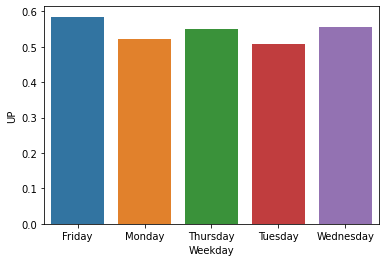

In [187]:
import seaborn as sns
sns.barplot(data=SPWd, x=SPWd.index, y=SPWd.UP)

In [128]:
df_SP.index.max()

Timestamp('2020-06-15 00:00:00')

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [188]:
df['Close'].pct_change() #One timeperiod percent change

Date
2017-01-03         NaN
2017-01-04    0.012381
2017-01-05   -0.003309
2017-01-06    0.004920
2017-01-09   -0.011090
                ...   
2020-06-09   -0.028582
2020-06-10   -0.015166
2020-06-11   -0.091322
2020-06-12    0.033048
2020-06-15   -0.002379
Name: Close, Length: 868, dtype: float64

In [189]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2020-06-09    0.086423
2020-06-10    0.090245
2020-06-11   -0.003210
2020-06-12    0.001232
2020-06-15   -0.031225
Name: Close, Length: 868, dtype: float64

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [190]:
n=13
df['Close'].pct_change(n).mean()

-0.002299645718231135

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [191]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [192]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2020-06-09    0.015920
2020-06-10    0.018908
2020-06-11    0.019183
2020-06-12    0.022674
2020-06-15    0.024579
Name: Close, Length: 868, dtype: float64

<h4>Calculate several moving averages and graph them</h4>

In [193]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

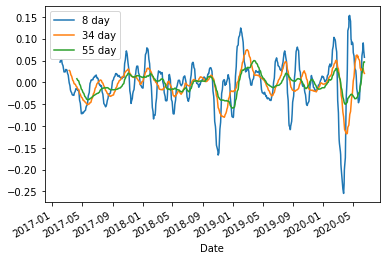

In [200]:
# This is useful - rolling windows
ma_8.plot()
ma_34.plot()
ma_55.plot()
plt.legend(['8 day','34 day','55 day'])

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [222]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','TSLA','SEDG'],'yahoo', start=start,end=end)['Close']

In [223]:
solar_df

Symbols,FSLR,TAN,TSLA,SEDG
Date,,,,
2015-07-01,46.040001,38.840000,269.149994,36.680000
2015-07-02,45.169998,38.549999,280.019989,36.090000
2015-07-06,44.189999,36.369999,279.720001,32.790001
2015-07-07,45.119999,36.099998,267.880005,30.719999
2015-07-08,43.270000,33.669998,254.960007,27.480000
...,...,...,...,...
2016-05-25,50.560001,22.090000,219.580002,21.160000
2016-05-26,49.730000,21.969999,225.119995,21.420000
2016-05-27,49.900002,21.959999,223.039993,21.600000


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [224]:
rets = solar_df.pct_change()
print(rets)

Symbols         FSLR       TAN      TSLA      SEDG
Date                                              
2015-07-01       NaN       NaN       NaN       NaN
2015-07-02 -0.018897 -0.007467  0.040386 -0.016085
2015-07-06 -0.021696 -0.056550 -0.001071 -0.091438
2015-07-07  0.021045 -0.007424 -0.042328 -0.063129
2015-07-08 -0.041002 -0.067313 -0.048231 -0.105469
...              ...       ...       ...       ...
2016-05-25  0.001982  0.001360  0.007664  0.016819
2016-05-26 -0.016416 -0.005432  0.025230  0.012287
2016-05-27  0.003418 -0.000455 -0.009240  0.008403
2016-05-31 -0.005010  0.002277  0.000852  0.011574
2016-06-01  0.008459  0.004089 -0.016440 -0.040732

[232 rows x 4 columns]


<h4>Let's visualize the relationship between each stock and the ETF</h4>

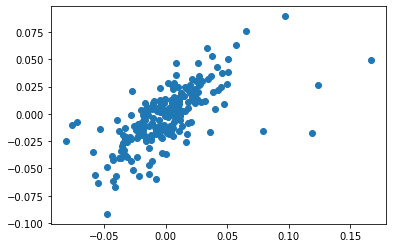

In [225]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

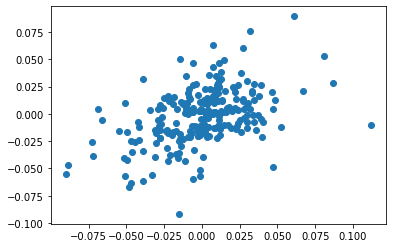

In [227]:
plt.scatter(rets.TSLA,rets.TAN)

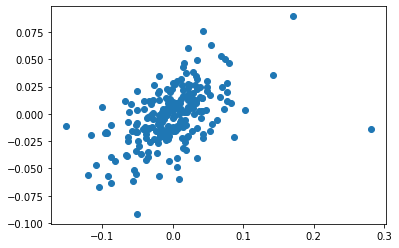

In [228]:
plt.scatter(rets.SEDG,rets.TAN)

<h4>The correlation matrix</h4>

In [229]:
solar_corr = rets.corr()
print(solar_corr)

Symbols      FSLR       TAN      TSLA      SEDG
Symbols                                        
FSLR     1.000000  0.670287  0.292105  0.340645
TAN      0.670287  1.000000  0.455966  0.504528
TSLA     0.292105  0.455966  1.000000  0.252021
SEDG     0.340645  0.504528  0.252021  1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

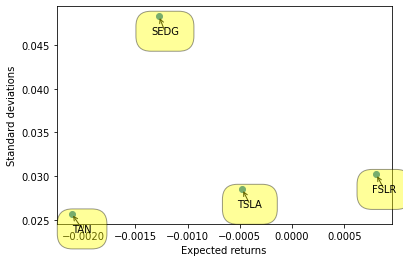

In [240]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=1.5', fc = 'yellow', alpha = 0.4),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [244]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','TSLA','SEDG']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     78.31
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           7.44e-35
Time:                        16:56:51   Log-Likelihood:                -603.26
No. Observations:                 232   AIC:                             1215.
Df Residuals:                     228   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4063      3.278      5.311      0.0

<h4>Finally plot the fitted line with the actual y values

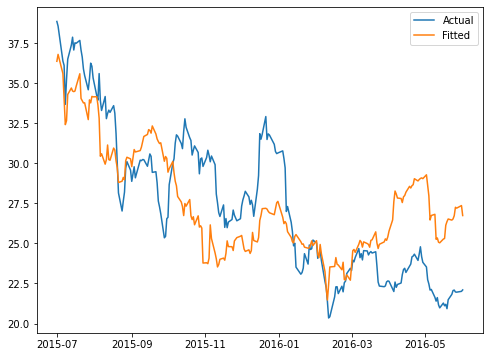

In [248]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)
plt.legend(['Actual','Fitted'])

# Knowledge Check

In [158]:
dfUS = pd.DataFrame({'nationality':['US','US','US','US','CA','US','US']})

In [164]:
dfUS['nationality'] = dfUS['nationality'].replace('US','United States')

SyntaxError: invalid syntax (<ipython-input-164-00b24e549767>, line 1)

In [165]:
dfUS.replace?

In [ ]:
dfUS['nationality'].replace

In [173]:
a = pd.Series([1,2,3,'a','b',[1,2,3]])

In [175]:
a

0            1
1            2
2            3
3            a
4            b
5    [1, 2, 3]
dtype: object

In [172]:
a

0    1
1    2
2    3
3    a
dtype: object

In [250]:
df = pd.DataFrame([389950, 230500, 158000, 479000, 639000, 114950, 5500000, \
                   387000, 659000, 529000, 575000, 488800, 1095000])

In [261]:
df.quantile(.75) - df.quantile(.25)

0    252000.0
dtype: float64

In [264]:
x = np.linspace(0,100,100)
y = x + np.random.normal()

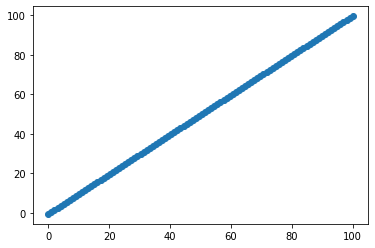

In [293]:
plt.plot(x,y,'o')

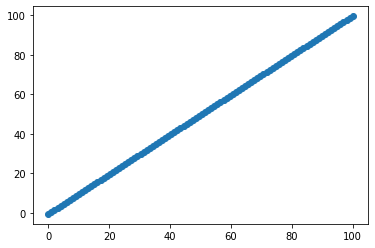

In [269]:
plt.scatter(x,y)

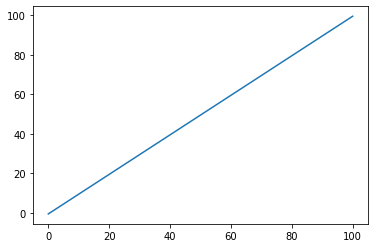

In [270]:
plt.plot(x,y)

In [271]:
grades = pd.DataFrame([82,91,79])

In [278]:
grades.columns = ['grade']

In [288]:
grades['grade'].rolling(2).mean()

0     NaN
1    86.5
2    85.0
Name: grade, dtype: float64

In [295]:
grades['grade'].rolling().mean()

TypeError: rolling() missing 1 required positional argument: 'window'